In [ ]:
!pip install tensorflow

### SIMPLE ANN NEURAL NETWORK

In [44]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [45]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=columns, na_values='?')
data.dropna(inplace=True)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.shape

(297, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [7]:
data["target"].value_counts()

,count
target,
0,160
1,54
2,35
3,35
4,13


In [46]:
X = data.drop("target", axis=1)
Y = keras.utils.to_categorical(data["target"].values)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(y_test.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,141 (43.52 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 384 (1.50 KB)

In [49]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2623 - loss: 2.6323 - val_accuracy: 0.1167 - val_loss: 17.3738
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2593 - loss: 2.6049 - val_accuracy: 0.1167 - val_loss: 11.9135
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3283 - loss: 2.5605 - val_accuracy: 0.1167 - val_loss: 8.2147
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3101 - loss: 2.0893 - val_accuracy: 0.1333 - val_loss: 5.4793
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3188 - loss: 2.1766 - val_accuracy: 0.2167 - val_loss: 4.0270
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3987 - loss: 2.1344 - val_accuracy: 0.2333 - val_loss: 3.0186
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3348 - loss: 2.0626 - val_accuracy: 0.3000 - val_loss: 2.3395
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3550 - loss: 2.2299 - val_accuracy: 0.3333 - val_los

In [51]:
model.evaluate(X_test, y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6188 - loss: 0.8984


[0.9457218647003174, 0.6000000238418579]

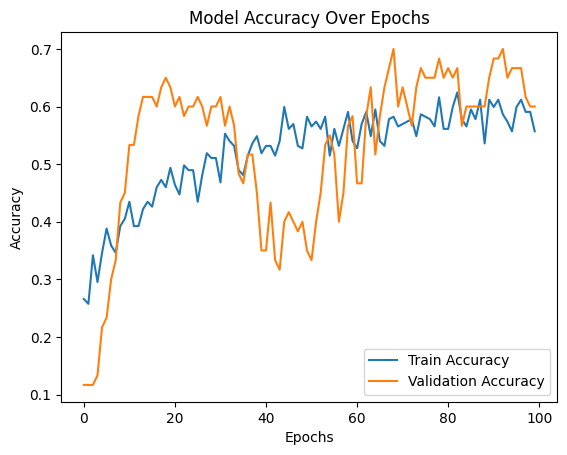

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


### CALLBACKS


In [53]:
from tensorflow.keras import callbacks

In [54]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 1.0990

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6016 - loss: 1.0255 - val_accuracy: 0.6167 - val_loss: 0.9098
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.5625 - loss: 1.1479

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5768 - loss: 1.0524 - val_accuracy: 0.6833 - val_loss: 0.8779
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6040 - loss: 1.0519 - val_accuracy: 0.6333 - val_loss: 0.9702
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5922 - loss: 1.0227 - val_accuracy: 0.7000 - val_loss: 0.8815
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5991 - loss: 0.9282 - val_accuracy: 0.6167 - val_loss: 0.9106
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6056 - loss: 0.9874 - val_accuracy: 0.6000 - val_loss: 0.9068
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6111 - loss: 1.0075 - val_accuracy: 0.6167 - val_loss: 0.9129
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5870 - loss: 0.9858 - val_accuracy: 0.6167 - val_loss: 1.0335
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5702 - loss: 1.0015 - val_accuracy: 0.6167 - val_loss: 1.0362
Epoc

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5812 - loss: 1.0314 - val_accuracy: 0.6167 - val_loss: 0.8484
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5409 - loss: 1.0758 - val_accuracy: 0.6667 - val_loss: 0.8884
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6382 - loss: 0.9197 - val_accuracy: 0.5833 - val_loss: 1.0053
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6398 - loss: 0.9445 - val_accuracy: 0.6167 - val_loss: 0.9929
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6489 - loss: 0.9313 - val_accuracy: 0.7000 - val_loss: 0.8819
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5980 - loss: 1.0139 - val_accuracy: 0.6167 - val_loss: 0.8488
Epoch 17/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6022 - loss: 1.0486 - val_accuracy: 0.6333 - val_loss: 0.8749
Epoch 18/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5738 - loss: 1.0044 - val_accuracy: 0.6333 - val_loss: 0.8899


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6395 - loss: 0.9774 - val_accuracy: 0.6167 - val_loss: 0.8405
Epoch 21/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5919 - loss: 0.9861 - val_accuracy: 0.6000 - val_loss: 0.8520
Epoch 22/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6702 - loss: 0.8837 - val_accuracy: 0.6333 - val_loss: 0.8788
Epoch 23/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5538 - loss: 1.0147 - val_accuracy: 0.5833 - val_loss: 0.9794
Epoch 24/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6234 - loss: 0.9747 - val_accuracy: 0.6000 - val_loss: 0.8481
Epoch 25/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5625 - loss: 0.9961

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6115 - loss: 0.9369 - val_accuracy: 0.6500 - val_loss: 0.8371
Epoch 26/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5842 - loss: 0.9542 - val_accuracy: 0.6500 - val_loss: 0.8402
Epoch 27/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5649 - loss: 0.9867 - val_accuracy: 0.5667 - val_loss: 0.8723
Epoch 28/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 0.8465

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6422 - loss: 0.9484 - val_accuracy: 0.6333 - val_loss: 0.8365
Epoch 29/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6257 - loss: 0.9405 - val_accuracy: 0.6167 - val_loss: 0.8568
Epoch 30/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5960 - loss: 0.9712 - val_accuracy: 0.6500 - val_loss: 0.8827
Epoch 31/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5913 - loss: 0.9587 - val_accuracy: 0.6500 - val_loss: 0.8747
Epoch 32/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5862 - loss: 0.9764 - val_accuracy: 0.6500 - val_loss: 0.8841
Epoch 33/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5928 - loss: 0.9986 - val_accuracy: 0.6333 - val_loss: 0.9201
Epoch 34/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6214 - loss: 0.8815 - val_accuracy: 0.6167 - val_loss: 0.9899
Epoch 35/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6243 - loss: 0.9907 - val_accuracy: 0.6667 - val_loss: 0.87

### SAVING AND LOADING A MODEL FOR PREDICTIONS

In [56]:
model.save("model.h5")

In [57]:
loaded_model = keras.models.load_model("model.h5")

In [58]:
def predict_new_data(new_data):
    new_data = pd.DataFrame(new_data, columns=X.columns)
    predictions = loaded_model.predict(new_data)
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

In [59]:
new_sample = [{"age": 50, "sex": 1, "cp": 2, "trestbps": 140, "chol": 250, "fbs": 0, "restecg": 1, "thalach": 160, "exang": 0, "oldpeak": 1.5, "slope": 2, "ca": 0, "thal": 3}]
predicted_label = predict_new_data(new_sample)
print(f"Predicted class: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted class: 0


### MAKE MODEL USING FUNCTIONAL API

In [60]:
from tensorflow.keras import Model, Input

In [64]:
inputs = Input(shape=(X_train.shape[1],))

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(y_test.shape[1], activation='softmax')(x)

In [65]:
model = Model(inputs=inputs, outputs=outputs)

In [66]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,141 (43.52 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 384 (1.50 KB)